In [146]:
pwd

'/home/wsuser/work'

In [147]:
!pip install keras==2.2.4

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.4 which is incompatible.


In [148]:
!pip install tensorflow

  Using cached keras-2.7.0-py2.py3-none-any.whl (1.3 MB)
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from keras.preprocessing.image import ImageDataGenerator



In [150]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen= ImageDataGenerator(rescale=1./255)

In [151]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_027fb3036d81447bb56783b2c76d1391 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_027fb3036d81447bb56783b2c76d1391 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_027fb3036d81447bb56783b2c76d1391 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='JMPcxigGeGADPZS7HUIrY52puy0fMqfTQ65CsznkijbB',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_027fb3036d81447bb56783b2c76d1391)

streaming_body_1 = client_027fb3036d81447bb56783b2c76d1391.get_object(Bucket='braintumor-donotdelete-pr-ssimryqv9ctpop', Key='brain_tumor_dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr (streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType(__iter__, streaming_body_1 )

In [152]:
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [153]:
pwd

'/home/wsuser/work'

In [154]:
import os
filename = os.listdir('/home/wsuser/work/brain_tumor_dataset/Trainset')

In [155]:
x_train=train_datagen.flow_from_directory("/home/wsuser/work/brain_tumor_dataset/Trainset", 
                                          target_size=(128,128), batch_size=32, class_mode="categorical")


x_test=train_datagen.flow_from_directory("/home/wsuser/work/brain_tumor_dataset/Testset", 
                                          target_size=(128,128), batch_size=32, class_mode="categorical")

Found 253 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [156]:
x_train.class_indices

{'no': 0, 'yes': 1}

In [157]:
model = Sequential()
#add cnn layer
model.add(Convolution2D(32,(5,5),input_shape=(128,128,3),activation="relu"))

#add maxpooling layer
model.add(MaxPooling2D(2,2))

#add flatten layer
model.add(Flatten())

#add hidden layer
model.add(Dense(units=128,activation="relu"))

#add output layer
model.add(Dense(units=2, activation="softmax"))

print(model.summary())

#configure the learning process
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

#fit the model
model.fit(x_train,steps_per_epoch= 8, epochs=20, validation_data=x_test,validation_steps=5 )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               15745152  
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 15,747,842
Trainable params: 15,747,842
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
8/8 [==============================] - 10s 1s/step - loss: 4.1938 - accuracy: 0.4925 - val_l

In [158]:
model.save("brain.h5")

In [159]:
!tar -zcvf Brain_Tumor_Detection-model_new.tgz brain.h5

brain.h5


In [160]:
ls -1

brain.h5
brain_tumor_dataset/
Brain_Tumor_Detection-model_new.tgz
validation/
Y14.jpg


In [161]:
!pip install watson-machine-learning-client --upgrade

In [162]:
!pip install --upgrade "ibm-watson>=5.2.3"

In [163]:

from ibm_watson_machine_learning import APIClient
wml_credentials = { "url": "https://us-south.ml.cloud.ibm.com",
                  "apikey": "7oA1PupCdA-zrbU7AWSiTnZdFQGeAemZuUzC43ZFiKiH"
                  }
client = APIClient(wml_credentials)


In [164]:
def guide_from_space_name(client,space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources']if item['entity']["name"]== space_name)['metadata']['id'])


In [165]:
space_uid = guide_from_space_name(client,'braintumor')
print("Space UID = " + space_uid)

Space UID = e24b309d-f4f8-4c8b-be2e-56f27462e853


In [166]:
client.set.default_space(space_uid)

'SUCCESS'

In [167]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [168]:
software_spec_uid = client.software_specifications.get_uid_by_name("tensorflow_1.15-py3.6")
software_spec_uid

'2b73a275-7cbf-420b-a912-eae7f436e0bc'

In [169]:
!pip install watson-machine-learning-client

In [170]:
model_details = client.repository.store_model(model='Brain_Tumor_Detection-model_new.tgz',
                                              meta_props= {
                                                  client.repository.ModelMetaNames.NAME:"CNN",
                                                  client.repository.ModelMetaNames.TYPE:"keras_2.2.4",
                                                  client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                              }) 
model_id = client.repository.get_model_uid(model_details)

Note: Warnings!! :  Model type keras_2.2.4 is deprecated. We recommend you use a supported model type. See Supported Frameworks https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/pm_service_supported_frameworks.html


In [171]:
model_id

'13494e73-c21a-435a-b892-9431fd157384'

In [172]:

from keras.preprocessing import image
from tensorflow.keras.models import load_model

In [173]:

streaming_body_4 = client_027fb3036d81447bb56783b2c76d1391.get_object(Bucket='braintumor-donotdelete-pr-ssimryqv9ctpop', Key='Y9.jpg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-6c9eb567-8054-45ef-924e-9dfba9a7e84e',
    'IBM_API_KEY_ID': 'JMPcxigGeGADPZS7HUIrY52puy0fMqfTQ65CsznkijbB',
    'ENDPOINT': 'https://s3.private.us.cloud-object-storage.appdomain.cloud',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'braintumor-donotdelete-pr-ssimryqv9ctpop',
    'FILE': 'Y9.jpg'
}
model = load_model('brain.h5')

In [174]:

streaming_body_6 = client_027fb3036d81447bb56783b2c76d1391.get_object(Bucket='braintumor-donotdelete-pr-ssimryqv9ctpop', Key='Y9.jpg')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
if not hasattr (streaming_body_6, "__iter__"): streaming_body_6.__iter__ = types.MethodType(__iter__, streaming_body_6)

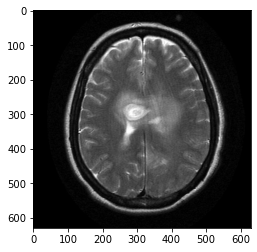

In [175]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

imgo = Image.open(streaming_body_6)
newsize = (128, 128)
im1 = imgo.resize(newsize)
im_array = np.asarray(img1)

plt.imshow(im_array)
plt.show()

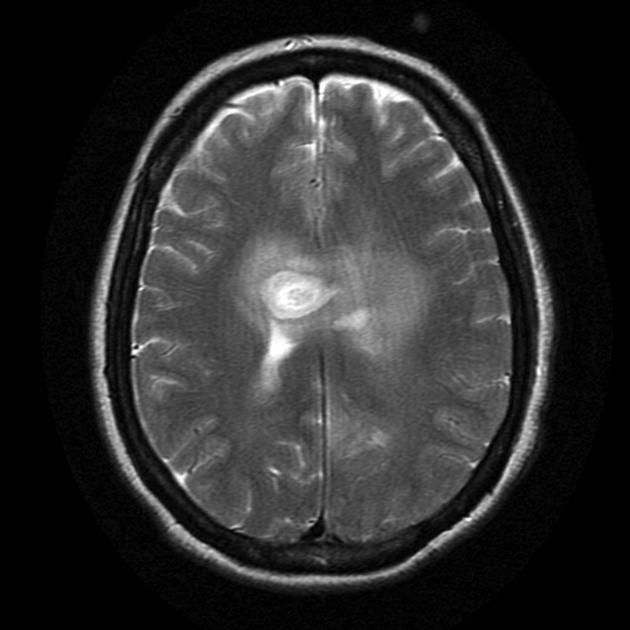

In [113]:
im1

In [134]:
x=image.img_to_array(im1)

In [135]:
x = np.expand_dims(x,axis = 0)

In [136]:
y=model.predict(x)

In [142]:
pred= np.argmax(y, axis=1)

In [143]:
pred

array([0])

In [144]:
index = ['Yes','No']

In [145]:
a = index[pred[0]]
print(a)

NO
